## Aim

Analyse the drifts on the tuning tape

In [95]:
from imctools.io import txtparser

import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib notebook

Define the variables:
The folder should contain the txt files from tunning tapes with 1 folder per day

In [214]:
folder_name = '/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/'
out_folder = '/home/vitoz/Data/Analysis/20161026_tuning_tape'

Load the txt files

In [12]:
txt_parsers = [txtparser.TxtParser(os.path.join(folder_name, subfol, fn))
           for subfol in os.listdir(folder_name) for fn in os.listdir(os.path.join(folder_name,subfol))]

Following files were used:

In [13]:
for p in txt_parsers:
    print(p.filename)

/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_6.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_52.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_35.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_46.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_13.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_18.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_88.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_82.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_58.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_24.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_30.txt
/mnt/bbvolume/hart_tma_data/20161025_tunning

In [14]:
imc_acs = [p.get_imc_acquisition() for p in txt_parsers]

In [220]:
ac = imc_acs[0]
ac.original_file

'/mnt/bbvolume/hart_tma_data/20161025_tunning_tapes/20160919/tuning_7_tuningtape_6.txt'

In [97]:
tuning_meta=(pd.DataFrame({'imc_acquisition': imc_acs})
               .assign(timepoint=lambda x:
                       x['imc_acquisition'].map(lambda ac: 
                                                int(ac.original_filename.rstrip('.txt').split('_')[3])),
                       date=lambda x:
                       x['imc_acquisition'].map(lambda ac: 
                                                os.path.basename(os.path.dirname(ac.original_file))))
)
               
tuning_meta['date'] = pd.to_datetime(tuning_meta['date'],format="%Y%m%d")

In [175]:
tuning_meta.index.name = 'img_index'

In [187]:
stats =[('mean' ,np.mean),('median', np.median)]
tuning_dat = tuning_meta['imc_acquisition'].map(
    lambda x:  [stat(v) for i, v in enumerate(x.get_img_stack_cyx()) for name, stat in stats])
#tuning_dat = pd.concat([tuning_meta, tuning_dat], axis=1)

cols = pd.MultiIndex.from_tuples([(m, name)
        for m in tuning_meta['imc_acquisition'][0].channel_metals for name, stat in stats],names =  ['metal', 'stat'])

tuning_dat = pd.DataFrame.from_items(tuning_dat.items())
tuning_dat.index = cols
tuning_dat = tuning_dat.T
tuning_dat = tuning_dat.reorder_levels([1, 0], axis=1)

tuning_dat.index.name = 'img_index'
tuning_dat = tuning_dat.stack()
tuning_dat = pd.DataFrame({'value': tuning_dat.stack()})

In [209]:
tuning_meta['imc_acquisition'].map(lambda x: x.shape)

img_index
0     (21, 102, 16)
1     (22, 102, 16)
2     (22, 102, 16)
3     (22, 101, 16)
4     (21, 102, 16)
5     (22, 102, 16)
6     (22, 102, 16)
7     (22, 101, 16)
8     (22, 102, 16)
9     (22, 102, 16)
10    (21, 102, 16)
11    (22, 102, 16)
12    (21, 102, 16)
13    (22, 101, 16)
14    (22, 102, 16)
15    (22, 101, 16)
16    (22, 102, 16)
17    (22, 102, 16)
18    (22, 102, 16)
19    (22, 102, 16)
20    (22, 102, 16)
21    (22, 102, 16)
22    (22, 102, 16)
23    (22, 102, 16)
24    (21, 102, 16)
25    (22, 102, 16)
26    (22, 102, 16)
27    (21, 102, 16)
28    (22, 102, 16)
29    (22, 102, 16)
30    (22, 102, 16)
31    (22, 102, 16)
32    (22, 102, 16)
33    (22, 102, 16)
34    (22, 102, 16)
35    (22, 102, 16)
36    (22, 102, 16)
37    (22, 102, 16)
38    (21, 102, 16)
39    (22, 102, 16)
40    (22, 102, 16)
41    (22, 102, 16)
42    (22, 102, 16)
43    (22, 102, 16)
44    (22, 102, 16)
45    (21, 102, 16)
46    (22, 102, 16)
47    (22, 102, 16)
48    (22, 102, 16)
49    (22,

<IPython.core.display.Javascript object>


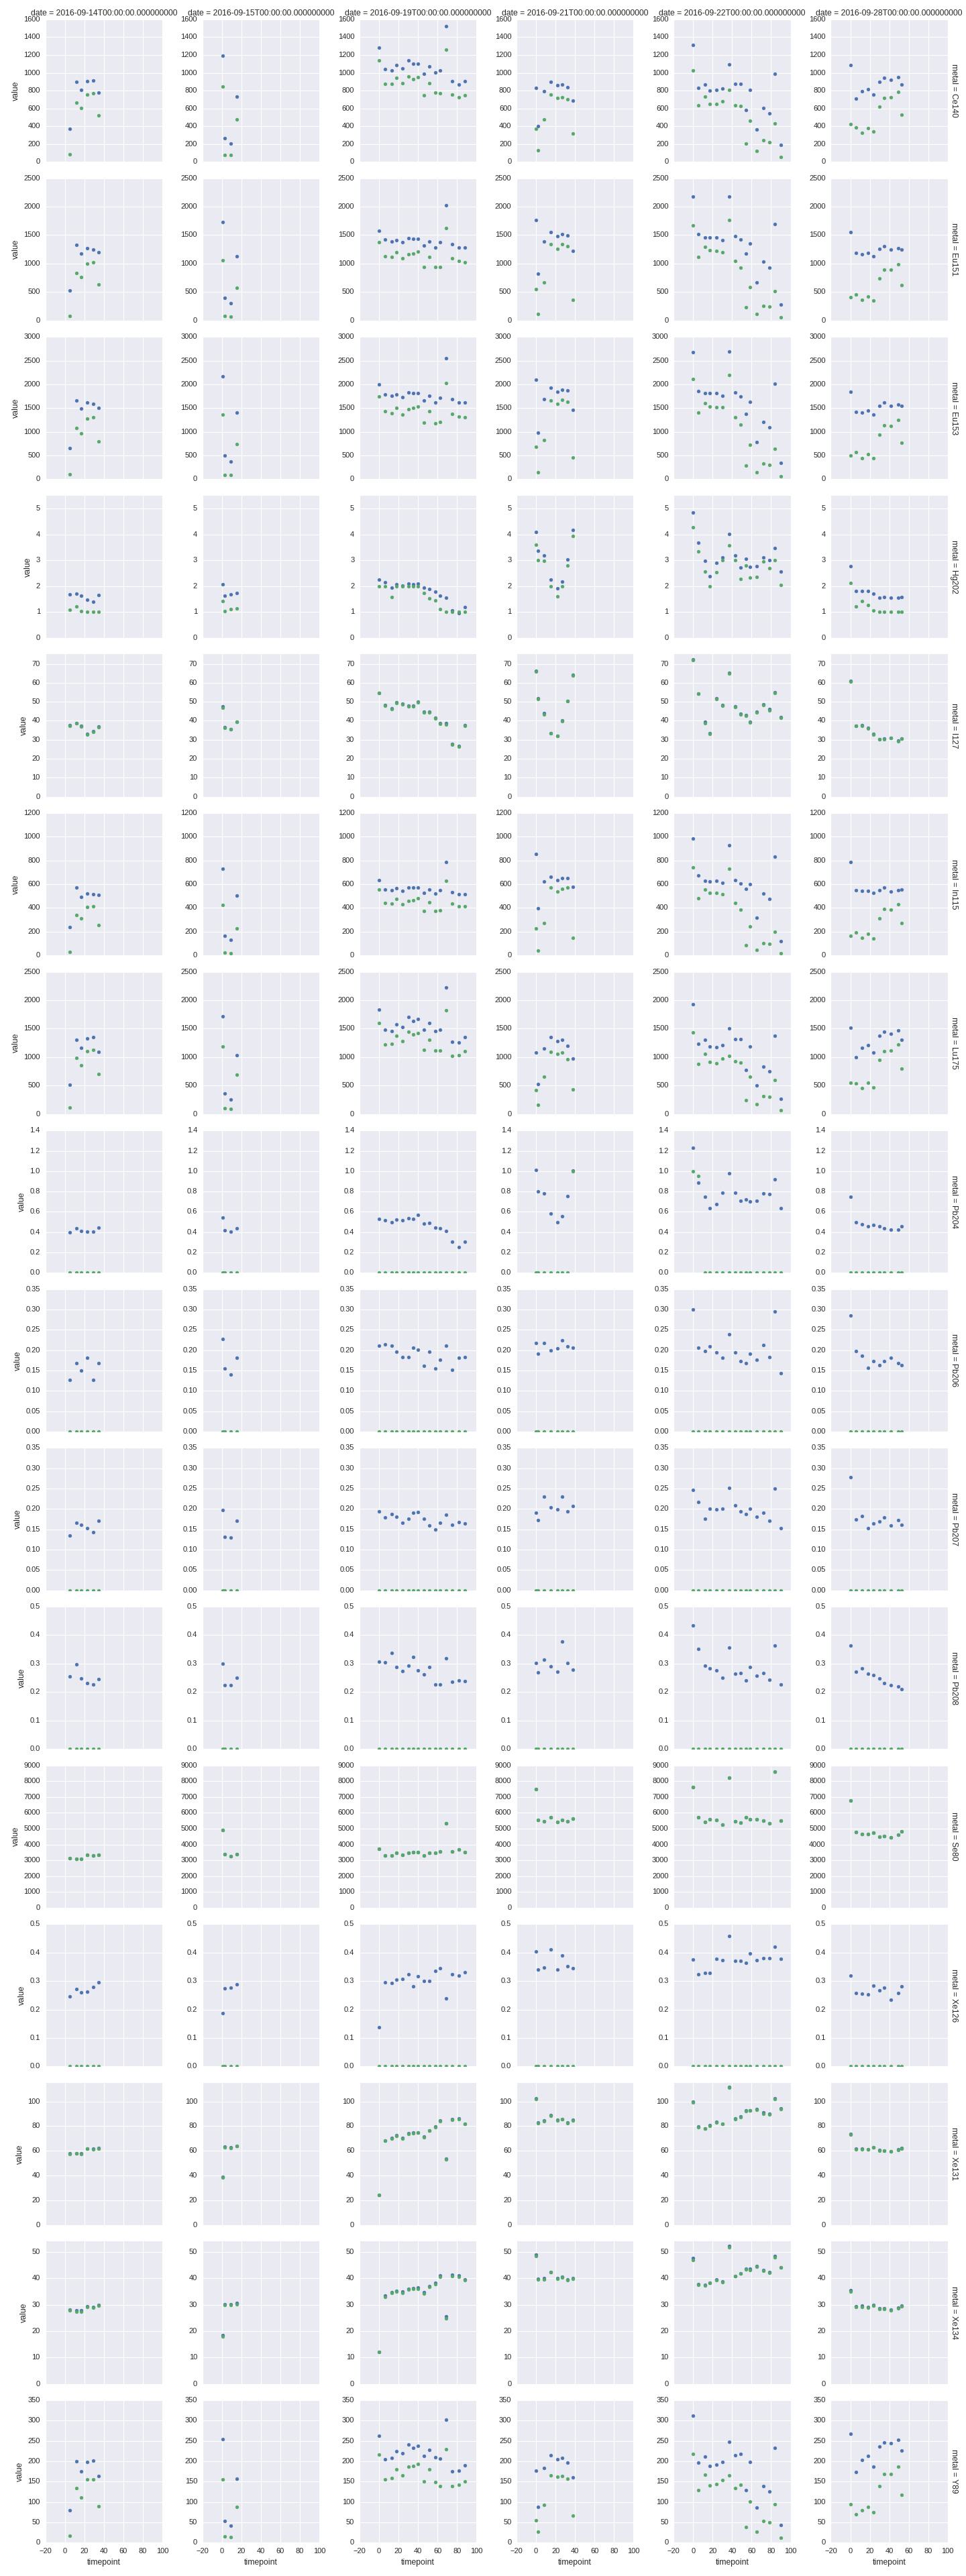

In [211]:
sns.set(context='notebook')
sns.set_style('darkgrid')
g = sns.FacetGrid(data=tuning_dat.join(tuning_meta).reset_index(drop=False),
                  col='date', row='metal', sharex=True, sharey=False, margin_titles=True,hue='stat',)
g.map(plt.scatter,'timepoint', 'value')

# fix the axes of the plot
for row in g.axes:
    # get the row max
    max_y = np.max([ax.get_ylim()[1] for ax in row])
    for ax in row:
        ax.set_ylim((0, max_y))


In [215]:
g.savefig(os.path.join(out_folder,'20161026_tuningtapesvstime.pdf'))

In [204]:
ax = g.axes[0][0]
ax.get_xlim()

(0.0, 40.0)